    Age  Gender Education Level          Job Title  Years of Experience   
0  32.0    Male      Bachelor's  Software Engineer                  5.0  \
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
Shape: (6704, 6)
Columns: Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object
               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     3

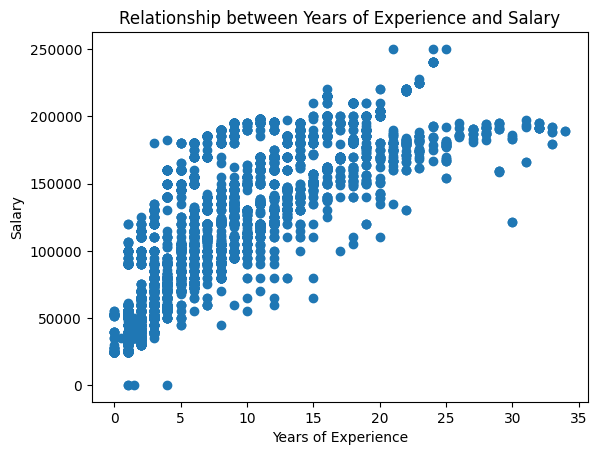

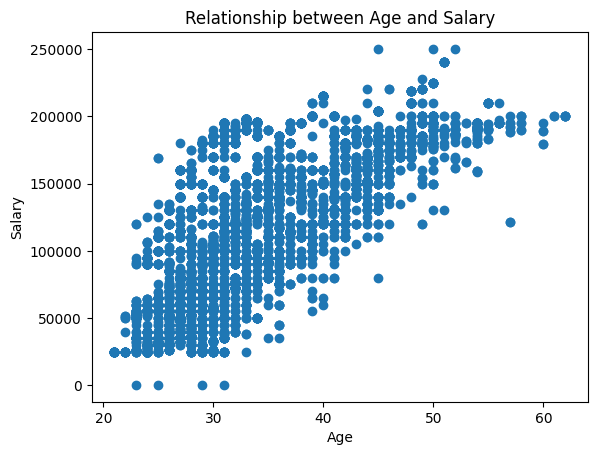

       Age  Gender    Education Level   
0     32.0    Male         Bachelor's  \
1     28.0  Female           Master's   
2     45.0    Male                PhD   
3     36.0  Female         Bachelor's   
4     52.0    Male           Master's   
...    ...     ...                ...   
6693  49.0  Female                PhD   
6694  32.0    Male        High School   
6695  30.0  Female  Bachelor's Degree   
6696  46.0    Male    Master's Degree   
6697  26.0  Female        High School   

                                              Job Title  Years of Experience   
0     <bound method IndexOpsMixin.tolist of 0       ...                  5.0  \
1     <bound method IndexOpsMixin.tolist of 0       ...                  3.0   
2     <bound method IndexOpsMixin.tolist of 0       ...                 15.0   
3     <bound method IndexOpsMixin.tolist of 0       ...                  7.0   
4     <bound method IndexOpsMixin.tolist of 0       ...                 20.0   
...                        

In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

script_dir = os.path.dirname(os.getcwd())  # Script directory
full_path = os.path.abspath(os.path.join(script_dir, "dataset", "Salary_Data.csv"))

data_vis = pd.read_csv(full_path)

# Display the first few rows of the dataset
print(data_vis.head())

# Get the number of rows and columns in the data_visset
print("Shape:", data_vis.shape)

# Get the column names
print("Columns:", data_vis.columns)

# Display the data_vis types of each feature
print(data_vis.dtypes)

# Get summary statistics of numerical features
print(data_vis.describe())

# Get unique values and their counts for categorical features
for column in data_vis.select_dtypes(include="object"):
    print(f"\n{column}:")
    print(data_vis[column].value_counts())

# Check for missing values
print(data_vis.isnull().sum())# Identify the target variable

# drop NaN values
data_vis.dropna(inplace=True)

target_variable = "Salary"
years_of_experience = "Years of Experience"
age = "Age"
gender = "Gender"
educatation_level = "Education Level"
job_title = "Job Title"

plt.scatter(data_vis[years_of_experience], data_vis[target_variable])
plt.xlabel(years_of_experience)
plt.ylabel(target_variable)
plt.title("Relationship between " + years_of_experience + " and " + target_variable)
plt.show()
plt.scatter(data_vis[age], data_vis[target_variable])
plt.xlabel(age)
plt.ylabel(target_variable)
plt.title("Relationship between " + age + " and " + target_variable)
plt.show()

# Load the data
data = pd.DataFrame({
    'Age': data_vis[age].tolist(),
    'Gender': data_vis[gender].tolist(),
    'Education Level': data_vis[educatation_level].tolist(),
    'Job Title': data_vis[job_title].tolist,
    'Years of Experience': data_vis[years_of_experience].tolist(),
    'Salary': data_vis[target_variable].tolist()
})

print(data)

# Separate features (X) and target variable (y)
X = data.drop("Salary", axis=1)
y = data["Salary"]

# Encode categorical variables
categorical_cols = ['Gender', 'Education Level', 'Job Title']
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement candidate models
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)


# Evaluate the models
linear_regression_predictions = linear_regression.predict(X_test)
decision_tree_predictions = decision_tree.predict(X_test)
random_forest_predictions = random_forest.predict(X_test)
svm_predictions = svm.predict(X_test)

linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
svm_predictions_mse =  mean_squared_error(y_test, svm_predictions)

print("Linear Regression MSE:",linear_regression_mse)
print("Decision Tree MSE:",decision_tree_mse )
print("Random Forest MSE:", random_forest_mse)
print("Support Vector Machine MSE:", random_forest_mse)

mse_values = [linear_regression_mse, decision_tree_mse, random_forest_mse, svm_predictions_mse]
algorithm_names = ["Linear Regression", "Decision Tree", "Random Forest", "Support Vector Machine",]

best_algorithm_index = mse_values.index(min(mse_values))
best_algorithm_name = algorithm_names[best_algorithm_index]
best_algorithm_mse = mse_values[best_algorithm_index]

print("Best Performing Algorithm:", best_algorithm_name)
print("MSE of Best Performing Algorithm:", best_algorithm_mse)


